In [1]:
import pandas as pd
import seaborn as sns

In [2]:
Dados_logistica = pd.read_csv('Dados\supply_chain_data.csv')

In [3]:
Dados_logistica.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [33]:
receita = Dados_logistica['Revenue generated'].sort_values(ascending=True)

<Axes: ylabel='Revenue generated'>

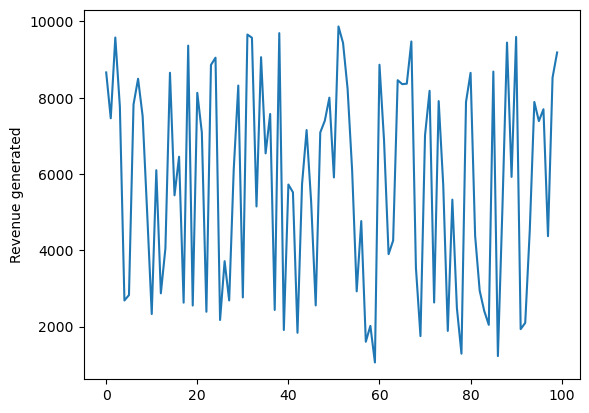

In [34]:
sns.lineplot(data=d)

In [4]:
Dados_logistica.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

## Isolando dados sobre a produção

In [5]:
Production = Dados_logistica[['Product type','SKU','Production volumes','Manufacturing lead time',
                              'Manufacturing costs','Defect rates','Supplier name']]

In [6]:
Production.head()

,Product type,SKU,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Supplier name
0,haircare,SKU0,215,29,46.279879,0.226410,Supplier 3
1,skincare,SKU1,517,30,33.616769,4.854068,Supplier 3
2,haircare,SKU2,971,27,30.688019,4.580593,Supplier 1
3,skincare,SKU3,937,18,35.624741,4.746649,Supplier 5
4,skincare,SKU4,414,3,92.065161,3.145580,Supplier 1


## Como estão distribuidos os custos de produção em cada categoria de produtos ?

In [7]:
import numpy as np
values = np.arange(0,100)

<Axes: xlabel='Product type', ylabel='Manufacturing costs'>

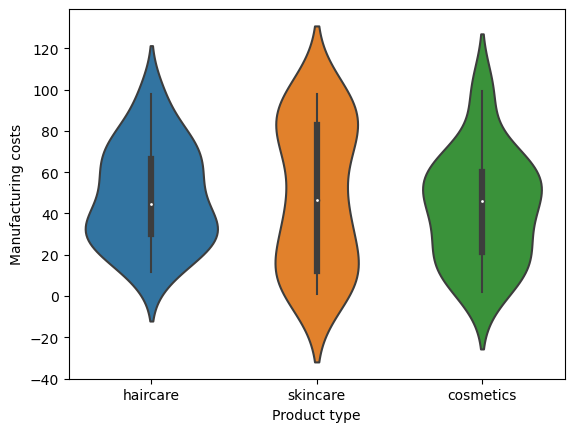

In [8]:
sns.violinplot(data=Production,x='Product type', y='Manufacturing costs')

-Vemos que as categoria 'haircair' e 'cosmetics' apresentam a maioria de seus custos de produção próximos a média das suas categorias. Com a maioria dos custos de produção de 'haircair' faixa entre 20-60 e de 'cosmetics na faixa entre 40-80

-A categoria 'skincare' apresenta uma distribuição dos custos de produção onde existe uma  concentração de produtos abaixo da média e outra que está acima da média, com uma menor concentração de custos proximos da média. **Isso pode ser um indicador de uma diferenciação entre produtos com padrões distintos de qualidade.**  

### Clusterizando a categoria 'skincare'

In [9]:
prod_sell = Dados_logistica[['Product type','SKU','Price','Manufacturing costs']]
prod_sell.head()

,Product type,SKU,Price,Manufacturing costs
0,haircare,SKU0,69.808006,46.279879
1,skincare,SKU1,14.843523,33.616769
2,haircare,SKU2,11.319683,30.688019
3,skincare,SKU3,61.163343,35.624741
4,skincare,SKU4,4.805496,92.065161


<Axes: xlabel='Manufacturing costs', ylabel='Price'>

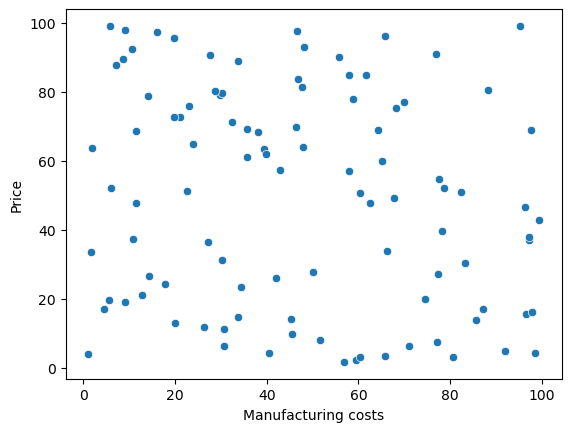

In [11]:
sns.scatterplot(data=prod_sell,x='Manufacturing costs',y='Price')

In [12]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

data = prod_sell[['Price','Manufacturing costs']]
data_norm = preprocessing.normalize(data)


In [16]:
kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(data_norm)

C:\Users\Felipe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init='auto', random_state=0)

In [18]:
hue = kmeans.labels_
print(hue)
data['hue'] = hue

[0 1 1 0 1 1 2 1 2 0 1 2 2 1 2 1 1 0 0 0 0 0 1 1 1 1 2 2 1 0 1 0 2 2 2 0 1
 0 2 2 0 0 1 1 2 1 1 2 2 2 1 2 2 1 0 2 0 0 0 2 1 0 2 0 2 2 0 2 1 0 2 1 0 0
 1 2 0 0 1 0 0 2 2 0 2 0 1 2 0 2 1 0 0 2 1 0 0 1 2 0]


<Axes: xlabel='Manufacturing costs', ylabel='Price'>

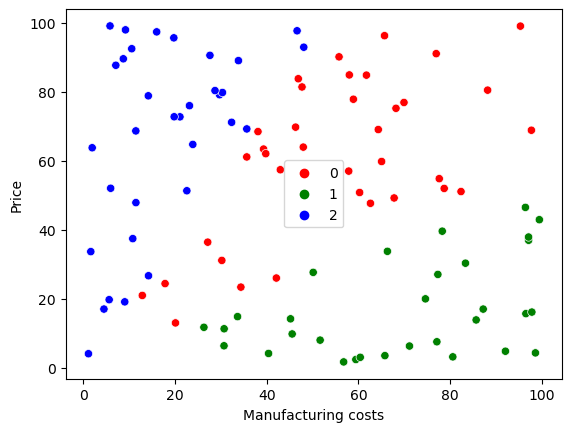

In [25]:
sns.scatterplot(data = data, x = 'Manufacturing costs', y = 'Price', hue = hue,palette=['red','green','blue'],legend='full')